In [1]:
import pandas as pd

df_train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [2]:
df_test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [3]:
import numpy as np
np.unique(df_train['Sentiment'])

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [4]:
df_train['Sentiment'].replace("anger",0,inplace = True)
df_train['Sentiment'].replace("fear",1,inplace = True)
df_train['Sentiment'].replace("joy",2,inplace = True)
df_train['Sentiment'].replace("love",3,inplace = True)
df_train['Sentiment'].replace("sadness",4,inplace = True)
df_train['Sentiment'].replace("surprise",5,inplace = True)

In [5]:
df_train.head(15)

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

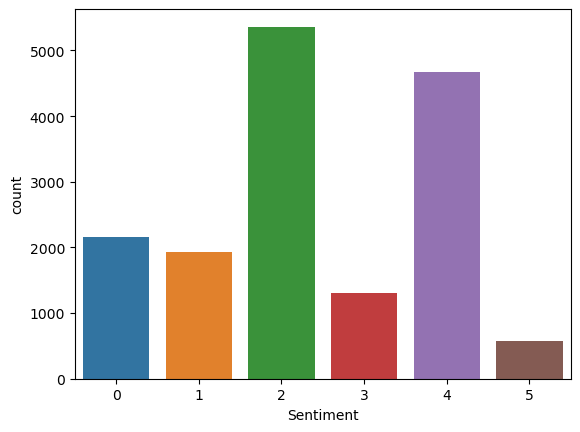

In [6]:
import seaborn as sns
sns.countplot(x="Sentiment",data=df_train)

In [7]:
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [9]:
df_train.describe()

,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [10]:
x = df_train["Input"]
y = df_train["Sentiment"]

In [11]:
x.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Input, dtype: object

In [12]:
y.head()

0    4
1    4
2    0
3    3
4    0
Name: Sentiment, dtype: int64

In [13]:
print(x.shape,y.shape)

(16000,) (16000,)


In [14]:
message = x.copy()
voc_size = 10000

message[0]

'i didnt feel humiliated'

In [15]:
import re
import nltk
from nltk.corpus import stopwords

In [16]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[0]

'didnt feel humili'

In [18]:
from tensorflow import keras
from keras_preprocessing.text import one_hot

In [19]:
one_hot_representation = [one_hot(words,voc_size) for words in corpus]

In [20]:
one_hot_representation[0]

[1441, 3185, 6722]

In [21]:
from keras_preprocessing.sequence import pad_sequences

In [22]:
sent_length = 20
embedded_doc = pad_sequences(one_hot_representation,padding='pre',maxlen=sent_length)
embedded_doc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1441, 3185, 6722])

In [23]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional

In [24]:
dimension = 40
model = Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='relu'))

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
final_input = np.array(embedded_doc)
final_output = np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [28]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
168/168 [==============================] - 6s 22ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/10
168/168 [==============================] - 3s 18ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/10
168/168 [==============================] - 3s 17ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/10
168/168 [==============================] - 3s 17ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/10
168/168 [==============================] - 3s 17ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/10
168/168 [==============================] - 3s 18ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 7/10
168/168 [==============================] - 3s 19ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 8/10
168/168 [=====================

In [29]:
def suicide_avoider(x):
    ps = PorterStemmer()
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', x)
    review = review.lower()
    review = review.split()
  
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
  
    voc_size = 5000
    one_hot_r = [one_hot(word, voc_size) for word in corpus]
  
    max_length = 20
    embedded_docs = pad_sequences(one_hot_r, maxlen=max_length, padding='pre')
  
    dimension = 40
    model = Sequential()
    model.add(Embedding(voc_size, dimension, input_length=max_length))
    model.add(Bidirectional(LSTM(100)))
    model.add(Dense(6, activation='softmax')) # Assuming multi-class, adjust according to your actual setup
  
    # For binary-like processing in a multi-class setup, though not recommended
    predictions = model.predict(np.array(embedded_docs))
    predicted_class_indices = np.argmax(predictions, axis=-1)
  
    # Class labels
    labels = ["angry", "fear", "joy", "love", "sad", "surprise"]
    predictions_binary_format = (predictions > 0.5).astype("int32") # Not applicable for multi-class but included as per request
  
    # Debug to see the output based on max probability
    for i, pred_class_index in enumerate(predicted_class_indices):
        print(f"Prediction for input {i}: {labels[pred_class_index]}")
  
    # Demo of binary-like handling for debugging purposes
    for i, prediction in enumerate(predictions_binary_format):
        if any(prediction): # Checks if any class probability was above 0.5
            print(f"Demo Binary-like Output for input {i}: Contains a class with probability > 0.5")
        else:
            print(f"Demo Binary-like Output for input {i}: No class has probability > 0.5")

In [30]:
x = str(input())

5


In [31]:
suicide_avoider(x)

1/1 [==============================] - 0s 472ms/step
Prediction for input 0: angry
Demo Binary-like Output for input 0: No class has probability > 0.5
